# Previsão de novos casos de Covid-19 na cidade de São Carlos

# Breve história para contextualizar:

Acredito que a maioria de nós nunca pensou passar por uma pandemia, mas infelizmente tivemos que vivênciar uma ocosionada por um vírus altamente transmissível que acabou infectando milhões e tirando a vida de muitos também.

O coronavírus surgiu no final de 2019 em um mercado popular na cidade de Wuhan, onde havia a comercialização de animais selvagens vivos, como cobras, castores e um deles o morcego, animal a qual foi atribuido a primeira aparição do microrganismo. Com a contaminação expressiva, em menos de 4 meses, no dia 11 de março de 2020 foi decretado pandemia pela Organização Mundial de Saúde (OMS).

Sintomas mais comuns:
* Febre
* Tosse
* Cansaço
* Perda de paladar ou olfato


Sintomas graves:
* Dificuldade para respirar ou falta de ar
* Perda da fala, mobilidade ou confusão
* Dores no peito

O que você precisa saber:
* Procure atendimento médico imediatamente se apresentar sintomas graves. Sempre ligue antes de ir ao médico ou posto de saúde, clínicas ou hospitais.
* Pessoas saudáveis que apresentarem os sintomas leves devem acompanhar a situação em casa.
* Em média, os sintomas aparecem cinco ou seis dias após a infeção pelo vírus. No entanto, eles também podem levar até 14 dias para se manifestarem.

----------------------------------------------

# Leitura Dataset

#### https://github.com/wcota/covid19br/blob/master/cases-brazil-cities-time.csv.gz

In [1]:
import numpy as np
import pandas as pd
import datetime

In [2]:
caminho = r'C:\Users\lagee\OneDrive\Documentos\Data Science\TSeries\Covid Project\cases-brazil-cities-time_2022.csv'
ds = pd.read_csv(caminho, sep=',')
ds.head()

epi_week        date state                    city   ibgeID  newDeaths  \
0       152  2022-01-01    GO      Abadia de Goiás/GO  5200050          0   
1       152  2022-01-01    MG  Abadia dos Dourados/MG  3100104          0   
2       152  2022-01-01    GO            Abadiânia/GO  5200100          1   
3       152  2022-01-01    PA           Abaetetuba/PA  1500107          0   
4       152  2022-01-01    MG               Abaeté/MG  3100203          0   

   deaths  newCases  totalCases  deaths_per_100k_inhabitants  \
0      44         1        2003                      480.454   
1      20         0         601                      284.819   
2      47         1         603                      225.171   
3     226         0        9915                      140.864   
4      44         0        1679                      189.142   

   totalCases_per_100k_inhabitants  deaths_by_totalCases  
0                        21871.588                 0.022  
1                         8558.815                 0.033  
2                         2888.900                 0.078  
3                         6179.919                 0.023  
4                         7217.470                 0.026

## Conhecendo  e preparando nosso dataset

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164176 entries, 0 to 1164175
Data columns (total 12 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   epi_week                         1164176 non-null  int64  
 1   date                             1164176 non-null  object 
 2   state                            1164176 non-null  object 
 3   city                             1164176 non-null  object 
 4   ibgeID                           1164176 non-null  int64  
 5   newDeaths                        1164176 non-null  int64  
 6   deaths                           1164176 non-null  int64  
 7   newCases                         1164176 non-null  int64  
 8   totalCases                       1164176 non-null  int64  
 9   deaths_per_100k_inhabitants      1164176 non-null  float64
 10  totalCases_per_100k_inhabitants  1164176 non-null  float64
 11  deaths_by_totalCases             1164176 non-null 

Podemos ver que é um banco de dados bem ricos nas informações, mas o nosso interesse em questão é apenas os novos casos.

A coluna que se refere a data de coleta dos dados for formatada como object, mas para análise de séries temporais será necessário transforma-la para o formato de datetime.

In [4]:
ds.tail()
# Temos dados até o dia de hoje

epi_week        date  state              city   ibgeID  newDeaths  \
1164171       230  2022-07-27     PR         Ângulo/PR  4101150          0   
1164172       230  2022-07-27     BA  Érico Cardoso/BA  2900504          0   
1164173       230  2022-07-27     PA         Óbidos/PA  1505106          1   
1164174       230  2022-07-27     SP           Óleo/SP  3533809          0   
1164175       230  2022-07-27  TOTAL             TOTAL        0        310   

         deaths  newCases  totalCases  deaths_per_100k_inhabitants  \
1164171      10         0         877                      341.180   
1164172       6         4         662                       57.072   
1164173     163        19        8498                      310.636   
1164174       5         0         159                      204.332   
1164175  677804     44514    33704393                      317.744   

         totalCases_per_100k_inhabitants  deaths_by_totalCases  
1164171                        29921.528                 0.011  
1164172                         6296.966                 0.009  
1164173                        16194.996                 0.019  
1164174                         6497.752                 0.031  
1164175                        15800.097                 0.020

In [5]:
# Transformar as datas em datetime[64]
ds['date'] = pd.to_datetime(ds['date'])
#ds.head()

In [6]:
# Pegando apenas a cidade de São Paulo
SP = ds[ds['city'] == 'São Paulo/SP']
SP.set_index('date', inplace = True)
SP.tail()

epi_week state          city   ibgeID  newDeaths  deaths  \
date                                                                   
2022-07-23       229    SP  São Paulo/SP  3550308         14   43296   
2022-07-24       230    SP  São Paulo/SP  3550308          6   43302   
2022-07-25       230    SP  São Paulo/SP  3550308          2   43304   
2022-07-26       230    SP  São Paulo/SP  3550308         27   43331   
2022-07-27       230    SP  São Paulo/SP  3550308         17   43348   

            newCases  totalCases  deaths_per_100k_inhabitants  \
date                                                            
2022-07-23       773     1101435                      349.263   
2022-07-24        78     1101513                      349.312   
2022-07-25        16     1101529                      349.328   
2022-07-26       603     1102132                      349.546   
2022-07-27       723     1102855                      349.683   

            totalCases_per_100k_inhabitants  deaths_by_totalCases  
date                                                               
2022-07-23                         8885.140                 0.039  
2022-07-24                         8885.769                 0.039  
2022-07-25                         8885.898                 0.039  
2022-07-26                         8890.763                 0.039  
2022-07-27                         8896.595                 0.039

In [7]:
# Serie de novos casos em São Paulo
nc = SP['newCases']

# Vamos remover a última obs porque é uma info incompleta
nc = nc.iloc[:-1] 

In [8]:
nc.tail()

date
2022-07-22    639
2022-07-23    773
2022-07-24     78
2022-07-25     16
2022-07-26    603
Name: newCases, dtype: int64

In [9]:
# Testando os index
print('número de linhas duplicadas:', nc.index.duplicated().sum())

# Garantindo que esteja ordenado
nc.sort_index(ascending=True, inplace = True)

número de linhas duplicadas: 0


In [10]:
nc

date
2022-01-01     68
2022-01-02      7
2022-01-03     24
2022-01-04    457
2022-01-05    448
             ... 
2022-07-22    639
2022-07-23    773
2022-07-24     78
2022-07-25     16
2022-07-26    603
Name: newCases, Length: 207, dtype: int64

Obs: Muitas vezes em séries temporais a previsão diária é muito mais sensível a erros, para alguns casos como este estudo em questão, onde queremos apenas prever o comportamento em geral dos novos casos de Covid-19, ver se esse número irá subir ou descer, um estudo agregado por um período maior, como por exemplo ter a visão média de casos na semana pode ser mais interessante.

In [11]:
#nc = nc.resample(rule = 'W').mean()

## Separando nossos dados para treinar e avaliar nosso modelo

Vamos separar nosso data set de forma que sobre 15 dias para avaliar os modelos.

In [12]:
def treino_teste(serie):
    # numero total de dias
    dias = len(serie)
    
    # Separando % dos dados para treino
    prop = 0.93
    n_dias_treino = int(dias*prop)
    
    x_treino, x_teste = serie.iloc[:n_dias_treino], serie.iloc[n_dias_treino:]
    
    return x_treino, x_teste

In [13]:
x_treino, x_teste = treino_teste(nc)

In [14]:
len(x_treino), len(x_teste)

(192, 15)

# Análise Exploratória

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#%matplotlib inline

In [16]:
plt.figure(figsize = (14,4))
px.line(data_frame = x_treino, title='Casos de Covid-19 na cidade de São Paulo')

<Figure size 1400x400 with 0 Axes>

## Algumas Observações & Questionamentos: 
----------------------------------

   * Podemos ver também que no ínicio do ano houve um aumento nos casos, surto causado justamente pelas viagens de ano novo e festas comemorativas. Somente em março a situação voltou a se controlou e infelizente de lá pra ca, vemos tendo uma tendência positiva no número de casos.
   
   * Também conseguimos enxergar que nossos dados contém valores negativos (o que não faz sentido).
   
   * Temos valores 0 que se distoam da série vista em partes como nessa parte em cima que dia 02/JUN temos 325 casos de covid, nos próximos 4 dias não há casos e depois no dia 07/JUN voltamos a ter 1357 casos, estranho não?
   


### Valores zeros

In [17]:
x_treino.loc[x_treino == 0,].count()

12

### Valores negativos

In [18]:
x_treino.loc[nc < 0]

date
2022-04-03   -12
2022-04-16    -7
2022-04-24   -18
2022-05-02   -51
Name: newCases, dtype: int64

In [19]:
#x_treino.loc["2022-05-02"]

## Gráfico de médias móveis - 7 dias

Normalmente é apresentado em telejornais, e o ponto interessante de dispor essa visualização é poder ver a tendência que a série demonstra a partir dos últimos 7 dias, acabamos "tirando" os pontos que se destacam da média e conseguimos ver para onde a série esta se deslocando.

In [20]:
X = x_treino 

In [21]:
df_aux = pd.DataFrame({'Real': x_treino,
                       'Média Móvel': X.rolling(window = 7).mean(),
                      'Desvio Padrão Médio': X.rolling(window = 7).std()},
                     index = X.index)

px.line(data_frame = df_aux,
       title = 'Média & Desvío Movel Covid-19 na cidade de São Carlos')

Aqui conseguimos ver que a série observada teve em seu pico, uma sequência de observações ruidosas. O desvios desse conjunto acompanha o andar da média móvel em seu formato.



# Decomposição da Série - Sazionalidade, Tendência, Resíduos
----------------

<AxesSubplot:title={'center':'Resíduos'}, xlabel='date'>

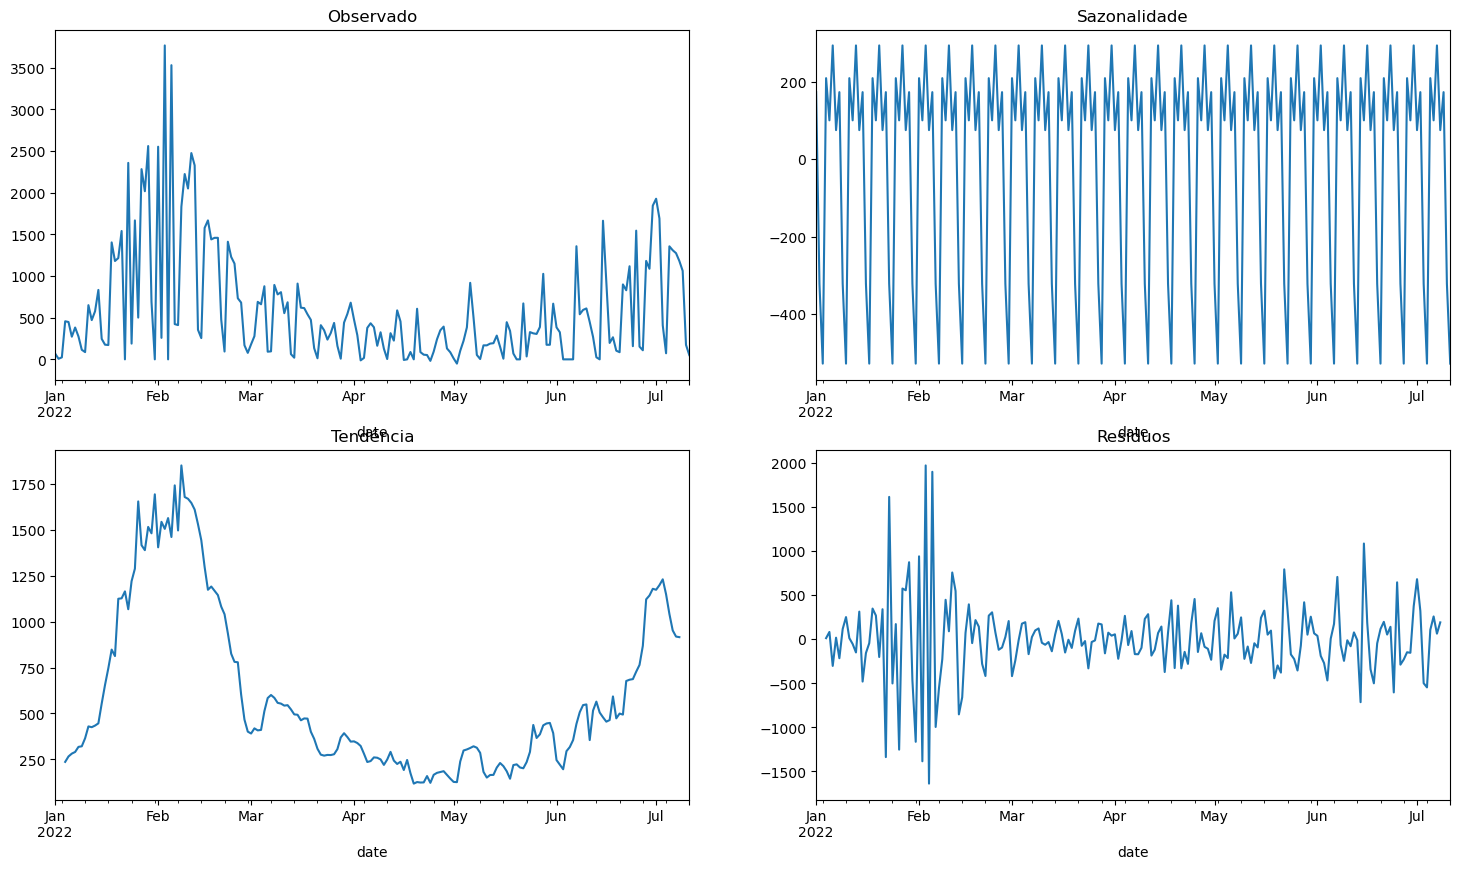

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(X, model = 'additive')

seasonal, trend, resid = decompose.seasonal, decompose.trend, decompose.resid

df_aux_dec = pd.DataFrame({'Observado': X,
                          'Sazonalidade': seasonal,
                          'Tendência': trend,
                          'Resíduos': resid}, index = X.index)

plt.figure(figsize = (18, 10))
# Observado
plt.subplot(2,2,1); X.plot(title = 'Observado')

# Sazonalidade
plt.subplot(2,2,2); seasonal.plot(title = 'Sazonalidade')

# Tendência
plt.subplot(2,2,3); trend.plot(title = 'Tendência')

# Resíduos
plt.subplot(2,2,4); resid.plot(title = 'Resíduos')

* Como dito previamente, no início do ano onde houve o pico de casos, a variação da série teve um aumento considerável o que pode tornar nossa série não normal.
* A sazonalidade aparenta permanecer a mesma ao longo de toda a série
* Temos a têndencia nitidamente em forma decrescente ao passar do tempo, portanto nossa série provavél que não seja estacionária também.

## Voltando a nossos questionamentos...

### Valores Negativos

Vamos assumir que os valores negativos são a marcação do oposto de número de casos.

In [23]:
def arruma_zeros(X):
    X = X.apply(lambda x: x*(-1) if x < 0 else x)
    
arruma_zeros(X)        

### Sequência de zeros
Vamos fazer a análise de outliers, se estes zeres em linha se comportarem como outliers removeremos eleS do conjunto. Essa análise já irá remover qualquer outro tipo de outliers que tiver presente nas observações.

## Detectando outliers - ThymeBoost

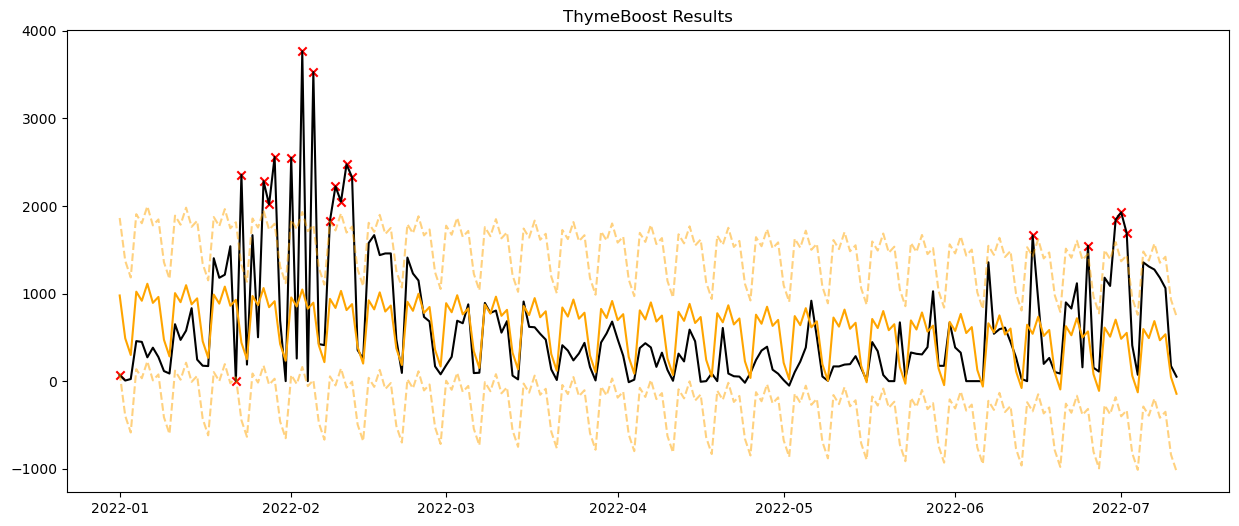

In [27]:
from ThymeBoost import ThymeBoost as tb
boosted_model = tb.ThymeBoost()
output = boosted_model.detect_outliers(X,
                                       trend_estimator='linear',
                                       seasonal_estimator='fourier',
                                       seasonal_period=7,
                                       global_cost='maicc',
                                       fit_type='global')

boosted_model.plot_results(output, figsize = (15,6))

In [28]:
# Transformando outliers em nan
X_clean = output.apply(lambda x: np.nan if x.outliers==True else x.y, axis=1)

# Interpolation
X_clean = X_clean.interpolate(method = 'linear')

# Removendo o primeiro valor que não conseguimos aplicar a interpolação
X_clean = X_clean.iloc[1:]

### Detecção de Sazonalidade, Outliers e Changepoints usando pacote KATS

In [29]:
#!pip install kats==0.2 statsmodels==0.12.2

## Testes Estatísticos
----------------
### Teste de Estacionaridade

In [30]:
# KPSS test

from statsmodels.tsa.stattools import kpss, adfuller

def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, nlags = 40, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

In [31]:
kpss_test(X_clean)

KPSS Statistic: 0.16124600171421127
p-value: 0.1
num lags: 40
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


In [32]:
#!pip install pmdarima 

#### Outras funções que nos mostra o nível de diferenciação, caso necessário, são as funções ndiffs e nsdiffs do pacote pmdarima

In [33]:
from pmdarima.arima import nsdiffs, ndiffs

In [34]:
# quantas diferenças tomar

ndiffs(X_clean)

0

In [35]:
# quantas diferenças sazionais tomar

nsdiffs(X, m = 52)    # semanal

0

### Teste de normalidade

In [36]:
from scipy.stats import shapiro

def shapiro_test(ts):
    statistic, p_value = shapiro(ts)
    
    print(f'Shapiro-Wilk Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'A série {"não" if p_value < 0.05 else ""} segue uma distribuição normal')
    
shapiro_test(X_clean)    

Shapiro-Wilk Statistic: 0.8805283904075623
p-value: 3.5088605632171976e-11
A série não segue uma distribuição normal


<AxesSubplot:ylabel='Density'>

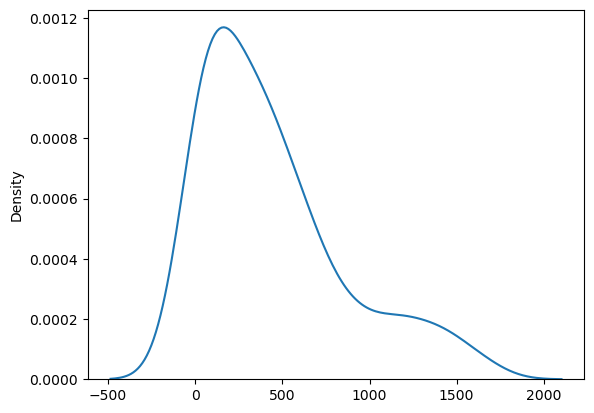

In [37]:
sns.kdeplot(X_clean)

## ACF & PACF

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

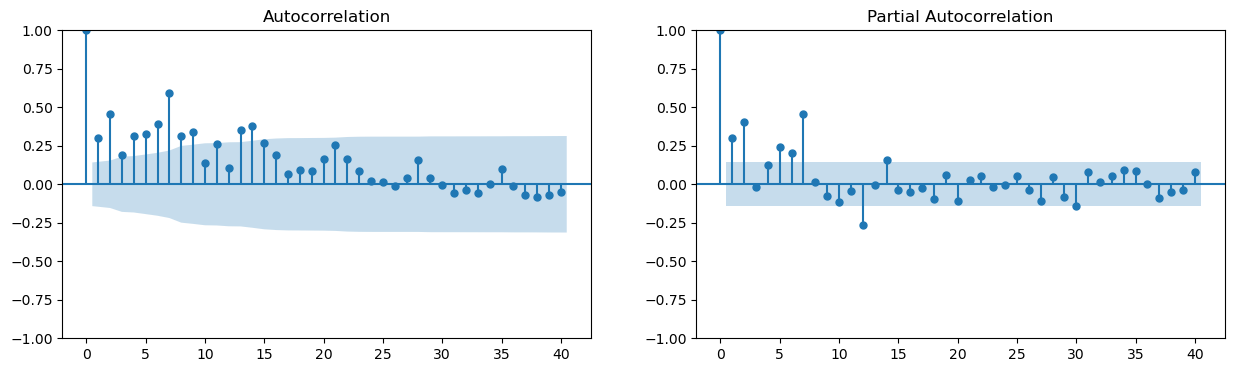

In [39]:
#plot_acf(X_diff, lags=20), plot_pacf(X_diff, lags = 20)
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = plot_acf(X.iloc[1:], lags=40, ax=axes[0])
fig = plot_pacf(X.iloc[1:], lags=40, ax=axes[1], method ='ywm')

Provavelmente usaremos um modelo ARIMA, temos as autocorrelações assim como as autocorrelações parciais decrescendo gradualmente.

--------------------------------------------

# Modelos

## Arima
-----------
## Aplicando transformações em nossa série

In [40]:
from pmdarima import AutoARIMA
from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer

X_clean_positive = X_clean[X_clean>0]


pipeline = Pipeline([
    ("boxcox", BoxCoxEndogTransformer()),  # Aplicando a transformação BoxCox a fim de ter uma série com distribuição mais próxima da normal
    ("model", AutoARIMA())    # Aplicando o AutoArima                
                     ])

pipe = pipeline.fit(X_clean_positive)
pipe_preds = pipe.predict(len(x_teste))

In [41]:
pipe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  176
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -595.503
Date:                Mon, 05 Dec 2022   AIC                           1197.005
Time:                        21:42:08   BIC                           1206.517
Sample:                             0   HQIC                          1200.863
                                - 176                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.1703      1.324      8.435      0.000       8.575      13.766
ar.L1          0.4270      0.069      6.155      0.000       0.291       0.563
sigma2        50.8087      5.881      8.640      0.000      39.282      62.335
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 0.36
Prob(Q):                              0.83   Prob(JB):                         0.83
Heteroskedasticity (H):               1.21   Skew:                             0.06
Prob(H) (two-sided):                  0.47   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Avaliação

## Vamos criar uma função para avaliar nossos modelos

A média simétrica de erro percentual absoluto (**SMAPE**) é uma medida de precisão baseada em erros percentuais (ou relativos). Definida da seguinte forma:

$$\dfrac{100\%}{n}\dfrac{|F_t-A_t|}{\dfrac{(|A_t|+|F_t|)}{2}}$$

Vamos usar também o erro quadrático médio **RSE**.

In [42]:
from pmdarima.metrics import smape
from sklearn.metrics import mean_squared_error

def metrics_model(model_name, yhat, ytrue):
    smape_ = smape(ytrue, yhat)
    rse = mean_squared_error(ytrue, yhat)
    
    dc = {'SMAPE': smape_,
         'RSE': rse}
    
    return pd.DataFrame(data= dc, index=[model_name])

In [43]:
metrics_model('AutoArima', x_teste, pipe_preds)

SMAPE            RSE
AutoArima  103.926079  284280.325896

In [44]:
pipe_preds = pd.Series(data=pipe_preds, index=x_teste.index)

In [45]:
#px.line(x=x_teste.index, y=[x_teste, pipe_preds])

## ETS

In [46]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

def get_best_ETS(dados):
    ETS = dict()
    ETS['AAA'] = ETSModel(dados, error='add', trend='add', seasonal='add')
    ETS['AAAd'] = ETSModel(dados, error='add', trend='add', seasonal='add', damped_trend=True)
    ETS['AAM'] = ETSModel(dados, error='add', trend='add', seasonal='mul')
    ETS['AAMd'] = ETSModel(dados, error='add', trend='add', seasonal='mul', damped_trend=True)
    ETS['AMM'] = ETSModel(dados, error='add', trend='mul', seasonal='mul')
    ETS['AMMd'] = ETSModel(dados, error='add', trend='mul', seasonal='mul', damped_trend=True)
    ETS['MMM'] = ETSModel(dados, error='mul', trend='mul', seasonal='mul')
    ETS['MMMd'] = ETSModel(dados, error='mul', trend='mul', seasonal='mul', damped_trend=True)
    return ETS

In [47]:
ets_models = get_best_ETS(X_clean)

In [48]:
inicio_teste = x_teste.index[0].strftime('%Y-%m-%d')
fim_teste = x_teste.index[-1].strftime('%Y-%m-%d')

In [49]:
X_clean

date
2022-01-02       7.0
2022-01-03      24.0
2022-01-04     457.0
2022-01-05     448.0
2022-01-06     272.0
               ...  
2022-07-07    1274.0
2022-07-08    1180.0
2022-07-09    1062.0
2022-07-10     174.0
2022-07-11      51.0
Length: 191, dtype: float64

In [50]:
for model in ets_models:
    # fit model
    model_fit = ets_models[model].fit()
    
    # predicts
    predicao = model_fit.predict(start=inicio_teste, end=fim_teste)
    
    #avaliação
    display(metrics_model('ETS '+model, x_teste, predicao))

SMAPE           RSE
ETS AAA  59.050937  111138.61069

SMAPE           RSE
ETS AAAd  55.231231  77806.254496

In [51]:
model_ets = ets_models['AAAd'].fit()
ets_preds = model_ets.predict(start=inicio_teste, end=fim_teste)

#px.line(x=x_teste.index, y=[x_teste, ets_preds])

## STL

In [52]:
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA


stlf = STLForecast(X_clean, ARIMA, model_kwargs={"order": (5, 1, 2)})
res = stlf.fit()
stl_forecasts = res.forecast(len(x_teste))

In [53]:
metrics_model('STL', stl_forecasts, x_teste)

SMAPE            RSE
STL  60.336671  200459.903925

In [54]:
#px.line(x=x_teste.index, y=[x_teste, stl_forecasts])

## Prophet

In [55]:
from prophet import Prophet

In [56]:
df = pd.DataFrame({'ds': X_clean.index,
                  'y': X_clean})

In [57]:
prophet_ = Prophet(yearly_seasonality=True, daily_seasonality=True)

proph = prophet_.fit(df)

21:42:10 - cmdstanpy - INFO - Chain [1] start processing
21:42:11 - cmdstanpy - INFO - Chain [1] done processing


In [58]:
future = prophet_.make_future_dataframe(periods=len(x_teste))
future.tail()

ds
201 2022-07-22
202 2022-07-23
203 2022-07-24
204 2022-07-25
205 2022-07-26

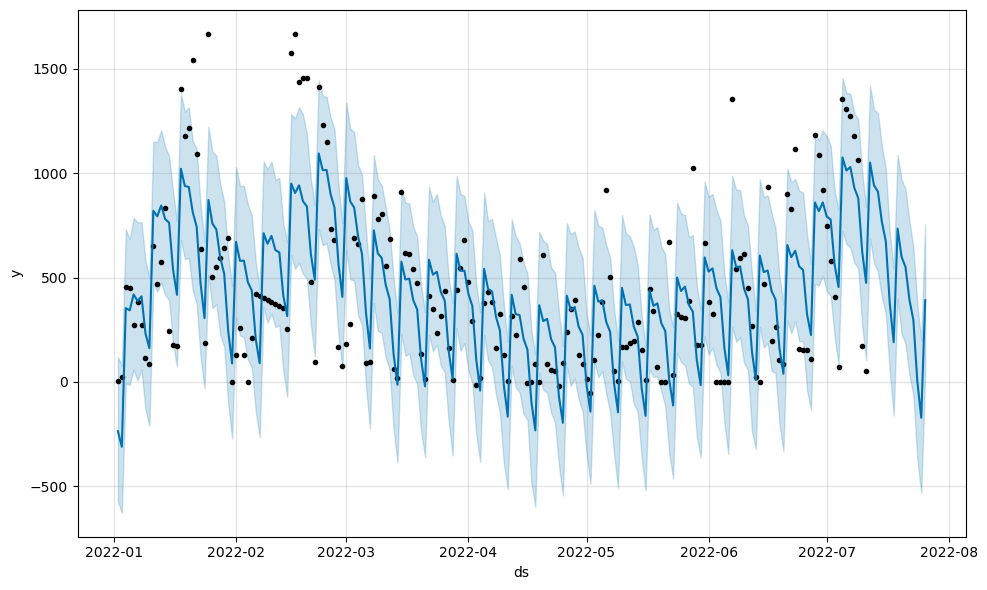

In [59]:
forecast = proph.predict(future)

proph.plot(forecast);

In [60]:
prophet_forec = forecast['yhat'].iloc[-len(x_teste):]

In [61]:
metrics_model('Prophet', x_teste, prophet_forec)

SMAPE           RSE
Prophet  65.418564  59881.746156

In [62]:
prophet_forec.index = x_teste.index
#prophet_forec

In [63]:
forecs = pd.DataFrame({#'Real': x_teste,
                       'ARIMA': pipe_preds,
                       'ETS': ets_preds,
                       'STL': stl_forecasts,
                       'Prophet': prophet_forec}, index=x_teste.index)

In [64]:
forecs.tail()

ARIMA          ETS          STL     Prophet
date                                                        
2022-07-22  357.710026   747.274750  1099.613603  394.509487
2022-07-23  357.734917   675.001879   944.042178  296.605155
2022-07-24  357.745544   348.905711   315.658547    4.982899
2022-07-25  357.750082   256.235486    91.898918 -171.404954
2022-07-26  357.752019  1234.218009  1513.245901  391.910554

In [65]:
px.line(pd.concat([nc.iloc[-40:], forecs]))

## Combinação de modelos

Cada um dos modelos acima tem suas próprias caracteristicas, seus próprios parâmetros e enxergam propriedades diferentes da série analisada, então muita das vezes a combinação de modelos pode ser a chave para obter um modelo mais parcimonioso. 

Por exemplo, podemos tomar como nossa previsão a média das previsões de $n$ modelos.
Uma combinação que encontrei e sempre verifico é tomar a média ponderada dos modelos, tendo como pesos o erro daquele modelo em questão. Analisando o gráfico acima, podemos ver que o modelo ETS realizou previsões em geral acima dos valores reais de novos casos, enquanto o modelo Prophet realizou previsões abaixo. Mas principalmente o formato da curva de previsão dos dois modelos se mostrou parecida com os dados reais, então vamos realizar a combinação desses modelos.

$$\frac{a \cdot SMAPE_{ETS} + s \cdot SMAPE_{Prophet}}{SMAPE_{Prophet}\cdot SMAPE_{ETS}}$$

In [66]:
# ETS SMAPE
model_fit = ets_models['AAAd'].fit() # fit model
ets_forec = model_fit.predict(start=inicio_teste, end=fim_teste) # predicts
ets_smape = metrics_model('ETS', x_teste, ets_forec)['SMAPE']

# Prophet SMAPE
prophet_smape = metrics_model('Prophet', x_teste, prophet_forec)['SMAPE']


sum_mapes = ets_smape.values + prophet_smape.values

IMPROVE = ((np.array(prophet_smape)*ets_forec + np.array(ets_smape)*prophet_forec)
           / sum_mapes)

In [67]:
metrics_model('Combinacao', IMPROVE, x_teste)

SMAPE           RSE
Combinacao  42.707759  34153.618198

Melhoramos relativamente bem as previsões!!

In [68]:
df_plot = pd.DataFrame({'Real': nc.iloc[-50:], 'Previsão': IMPROVE}, index=nc.iloc[-50:].index)
px.line(df_plot)

# Análise de Resíduos

In [69]:
res = (x_teste - IMPROVE)

In [70]:
#from statsmodels.tsa.stattools import breakvar_heteroskedasticity_test
from scipy.stats import shapiro

In [71]:
def shapiro_test(ts):
    statistic, p_value = shapiro(ts)
    
    print(f'Shapiro-Wilk Statistic: {statistic}')
    print(f'p-value: {p_value}')
    
shapiro_test(res)    

Shapiro-Wilk Statistic: 0.934606671333313
p-value: 0.3193565011024475


Resíduos Normais

<AxesSubplot:ylabel='Density'>

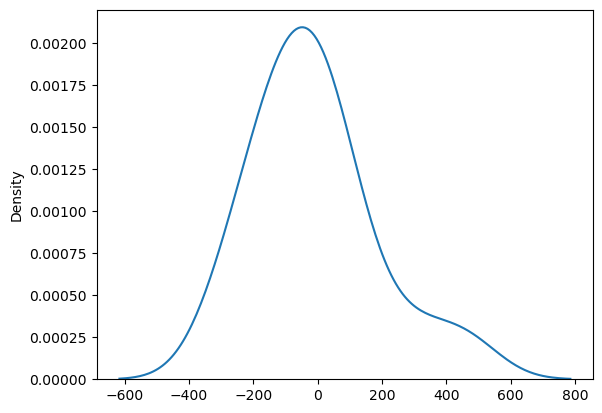

In [72]:
sns.kdeplot(res)

-----------------------------------------
# Prevendo os novos casos de Covid-19 registrados em São Paulo para os próximos 30 dias

In [73]:
nc

date
2022-01-01     68
2022-01-02      7
2022-01-03     24
2022-01-04    457
2022-01-05    448
             ... 
2022-07-22    639
2022-07-23    773
2022-07-24     78
2022-07-25     16
2022-07-26    603
Name: newCases, Length: 207, dtype: int64

In [74]:
# Agora que sabemos como iremos realizar as previsões, vamos usar todo nosso dataset para treinar os modelos.

# Prep
arruma_zeros(nc)        

# ETS SMAPE
ets_model_fit = ETSModel(nc.astype('float'), error='add', trend='add', seasonal='add', damped_trend=True).fit() # fit model

inicio_forec = '2022-07-27'
fim_forec = '2022-08-25'

ets_forec = ets_model_fit.predict(start=inicio_forec, end=fim_forec) # predicts

df = pd.DataFrame({'ds': nc.index,
                  'y': nc})

prophet_ = Prophet(yearly_seasonality=True, daily_seasonality=True)

proph = prophet_.fit(df)

future = prophet_.make_future_dataframe(periods=30)
future.tail()

p_forecast = proph.predict(future)
prophet_forec = p_forecast['yhat'].iloc[-30:]
prophet_forec.index = ets_forec.index

# ETS SMAPE
#ets_smape = metrics_model('ETS', x_teste, ets_forec)['SMAPE']

# Prophet SMAPE
#prophet_smape = metrics_model('Prophet', x_teste, prophet_forec)['SMAPE']


sum_mapes = ets_smape.values + prophet_smape.values

forecasts = pd.DataFrame({'Previsões': ((np.array(prophet_smape)*ets_forec + np.array(ets_smape)*prophet_forec)
           / sum_mapes)})

# Caso tenha previsões menores que 0, substituir por 0

forecasts[forecasts<0] = 0

# Transformando para inteiro novamente
forecasts = forecasts.astype(int)

21:42:13 - cmdstanpy - INFO - Chain [1] start processing
21:42:13 - cmdstanpy - INFO - Chain [1] done processing


In [75]:
forecasts

Previsões
2022-07-27        658
2022-07-28        779
2022-07-29        567
2022-07-30        712
2022-07-31         46
2022-08-01          0
2022-08-02        731
2022-08-03        692
2022-08-04        828
2022-08-05        629
2022-08-06        785
2022-08-07        127
2022-08-08          9
2022-08-09        820
2022-08-10        782
2022-08-11        916
2022-08-12        713
2022-08-13        864
2022-08-14        198
2022-08-15         71
2022-08-16        873
2022-08-17        824
2022-08-18        947
2022-08-19        733
2022-08-20        872
2022-08-21        196
2022-08-22         60
2022-08-23        852
2022-08-24        795
2022-08-25        912

In [76]:
px.line(pd.concat([nc, forecasts]))

Temos nossa previsão de novos casos de Covid-19 até fim de agosto, infelizmente a tendência é levemente crescente e podemos ver claramente a sazonalidade com picos e vales em sequência.


Após quase 3 anos do início da proliferação desse virús e ainda vemos a cidade de São Paulo batendo mais de 1000 novos casos/dia.
Tomara que tudo isso acabe logo e voltemos a ter nossas vidas como era antes.